<a href="https://colab.research.google.com/github/sean-condie/jupyter_notebooks/blob/main/TheChaosGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The chaos game is an example of finding order in chaos. The fact that a patern is generated from seemingly random inputs suggests that we are dealing with a type of attractor. 

Lets import our modules:

In [35]:
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt

To begin we need our "seed" points. These points are used by the randomly generated numbers to calculate where the next point should be. These points can be *anywhere*.

In [37]:
ax, ay = 0, 0 #seed 1
bx, by = 0, 0 #seed 2
cx, cy = 0, 0 #seed 3

Lets just assign random values for the points.

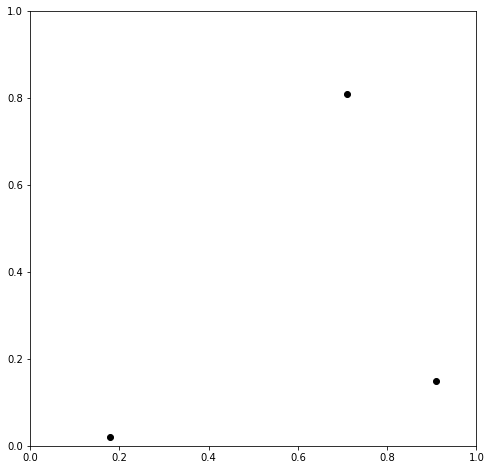

In [138]:
#seed the random module with the current time
random.seed(int(round(time.time()*1000)))

#generate random numbers for each point
ax = round(random.uniform(0.25,0.75), 2) #point a is limited to the top-middle
ay = round(random.uniform(0.75,1), 2)

bx = round(random.uniform(0,0.25), 2) #point b is limited to the bottom-left
by = round(random.uniform(0,0.25), 2)

cx = round(random.uniform(0.75,1), 2) #point c is limited to the bottom-right
cy = round(random.uniform(0,0.25), 2)

#arrange the x and y values together
x = np.array([ax, bx, cx])
y = np.array([ay, by, cy])

#set the size of the canvas/figure
plt.figure(figsize=(8,8))

#force axis range
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#plot the points
plt.plot(x, y, "ko")

#show the figure
plt.show()


Now that we have our canvas with three seed points, we need to generate one more random point. This new random point will then select, at random, one of the seed point and move 1/2 of the distance to it. 

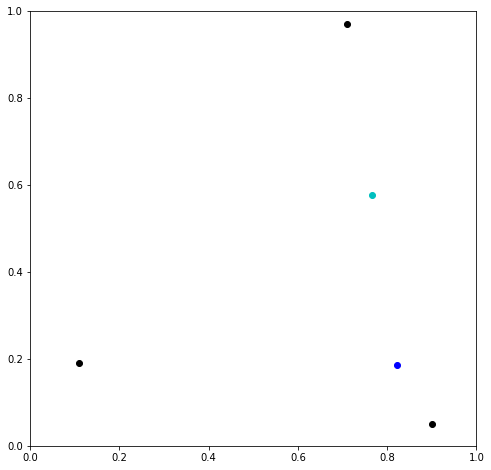

In [157]:
#seed the random module with the current time
random.seed(int(round(time.time()*1000)))

#generate random numbers for each point
ax = round(random.uniform(0.25,0.75), 2) #point a is limited to the top-middle
ay = round(random.uniform(0.75,1), 2)

bx = round(random.uniform(0,0.25), 2) #point b is limited to the bottom-left
by = round(random.uniform(0,0.25), 2)

cx = round(random.uniform(0.75,1), 2) #point c is limited to the bottom-right
cy = round(random.uniform(0,0.25), 2)

#arrange the x and y values together
x = np.array([ax, bx, cx])
y = np.array([ay, by, cy])

#set the size of the canvas/figure
plt.figure(figsize=(8,8))

#force axis range
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#plot the points (plotted in black)
plt.plot(x, y, "ko")

#generate our new random point (plotted in blue)
rx, ry = random.random(), random.random()
plt.plot(rx, ry, "bo")

#distance to travel to the seed point
dist = 0.5

#select, at random, one of the three seed points
rndSeed = random.randrange(1,3)

#initialize the new halfway point 
newX, newY = 0, 0

#set and plot new point depending on the seed selected (plotted in cyan)
if rndSeed == 1:
  #seed a was randomly selected
  newX = rx + ((ax - rx) * dist)
  newY = ry + ((ay - ry) * dist)
  plt.plot(newX, newY, "co")
elif rndSeed == 2:
  #seed b was randomly selected
  newX = rx + ((bx - rx) * dist)
  newY = ry + ((by - ry) * dist)
  plt.plot(newX, newY, "co")
else:
  #seed c was randomly selected
  newX = rx + ((cx - rx) * dist)
  newY = ry + ((cy - ry) * dist)
  plt.plot(newX, newY, "co")

#display the figure 
plt.show()


Now lets do this several thousand times and see what happens!

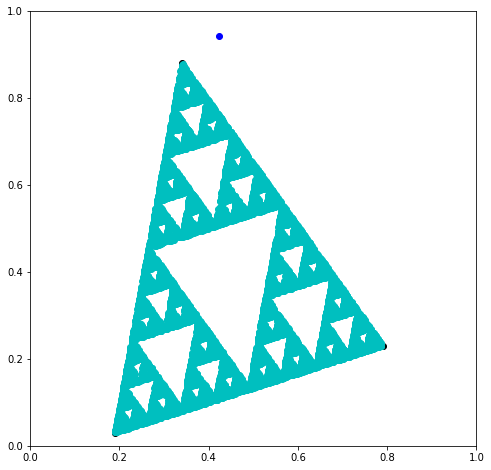

In [186]:
#seed the random module with the current time
random.seed(int(round(time.time()*1000)))

#generate random numbers for each point
ax = round(random.uniform(0.25,0.75), 2) #point a is limited to the top-middle
ay = round(random.uniform(0.75,1), 2)

bx = round(random.uniform(0,0.25), 2) #point b is limited to the bottom-left
by = round(random.uniform(0,0.25), 2)

cx = round(random.uniform(0.75,1), 2) #point c is limited to the bottom-right
cy = round(random.uniform(0,0.25), 2)

#arrange the x and y values together
x = np.array([ax, bx, cx])
y = np.array([ay, by, cy])

#set the size of the canvas/figure
plt.figure(figsize=(8,8))

#force axis range
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#plot the points (plotted in black)
plt.plot(x, y, "ko")

#generate our new random point (plotted in blue)
rx, ry = random.random(), random.random()
plt.plot(rx, ry, "bo")

#distance to travel to the seed point
dist = 0.5

#number of iterations to perform
numLoops = 10000

#for speed, lets generate arrays with the number of iterations and then just update each index with the new points
nx = np.arange(numLoops, dtype=float) #default datatype is int but our new points are floats
ny = np.arange(numLoops, dtype=float)

#plot 10,000 points
for i in range(numLoops):
  #select, at random, one of the three seed points
  rndSeed = random.randint(1,3)

  #set and plot new point depending on the seed selected (plotted in cyan)
  if rndSeed == 1:
    #seed a was randomly selected
    rx = rx + ((ax - rx) * dist) 
    ry = ry + ((ay - ry) * dist)
    nx[i] = rx #update the arrays at the current index
    ny[i] = ry
  elif rndSeed == 2:
    #seed b was randomly selected
    rx = rx + ((bx - rx) * dist)
    ry = ry + ((by - ry) * dist)
    nx[i] = rx #update the arrays at the current index
    ny[i] = ry
  else:
    #seed c was randomly selected
    rx = rx + ((cx - rx) * dist)
    ry = ry + ((cy - ry) * dist)
    nx[i] = rx #update the arrays at the current index
    ny[i] = ry

plt.plot(nx, ny, "co")
#display the figure 
plt.show()
